<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **t-SNE : t-distributed Stochastic Neighbor Embedding (clustering)**

In [ ]:
#!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=e6edf6d0907f90fb8f75aa5c624411f25354043645d0aa21bf639df836963712
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster

In [ ]:
#Reading data (cancer diagnosis data)
df = pd.read_csv('/content/TSNE_data.csv')
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#splitting data
x = df.iloc[:,1:]   #Independent features
y = df.iloc[:,0]    #Dependent features

# TSNE Model Building

In [ ]:
data = TSNE(n_components=2)

In [ ]:
data1 = data.fit_transform(x)   #Dimensionality reduction on independent features i.e.-> x

In [ ]:
data1

array([[ 42.104282 , -12.535738 ],
       [ 42.26981  ,  -9.85052  ],
       [ 37.6618   ,  -9.86557  ],
       ...,
       [ 22.16412  ,  -2.7382157],
       [ 40.147724 ,  -9.924445 ],
       [-38.263714 , -25.200678 ]], dtype=float32)

In [ ]:
#converting tSNE components to df
tsne = pd.DataFrame(data1,columns=['tsne1','tsne2'])

In [ ]:
#combine components with diagnosis column (dependent feature - y)
tsne = pd.concat([df['diagnosis'],tsne],axis=1)

In [ ]:
tsne

,diagnosis,tsne1,tsne2
0,M,42.104282,-12.535738
1,M,42.269810,-9.850520
2,M,37.661800,-9.865570
3,M,-17.582714,1.816186
4,M,36.543030,-7.761000
...,...,...,...
564,M,43.790070,-9.225799
565,M,38.597885,-9.270696
566,M,22.164120,-2.738216
567,M,40.147724,-9.924445


<Axes: xlabel='tsne1', ylabel='tsne2'>

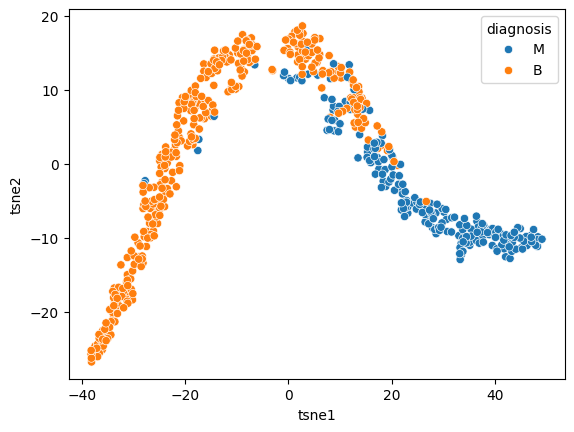

In [ ]:
#plotting tsne clusters
sns.scatterplot(x='tsne1', y='tsne2', hue='diagnosis', data=tsne)

* data1 now has tsne1 & tsne2 components, 30 independent dimensions are reduced to two components.

* Combine tsne1,tsne2 and y to generate a final dataframe

* consider tsne1 and tsne2 as the independent features and y as dependent features and build ML model on it.

In [ ]:
'''
x = df.iloc[:,1:]   #Independent features
y = df.iloc[:,0]    #Dependent features

'''

'\nx = df.iloc[:,1:]   #Independent features\ny = df.iloc[:,0]    #Dependent features\n\n'